In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use('dark_background')
#directory changing 
import os
os.getcwd()
# os.chdir('/personal/Python Projects/kaggle house price prediction/')

#Modify the ast_note_interactivity kernel option to see the value of multiple statements at once.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Change the display settings for columns
pd.options.display.max_columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
#Importing datasets
traindata=pd.read_csv('train.csv') #,encoding='latin1'
testdata=pd.read_csv('test.csv')

## Exploratory Data Analysis

### Null Values

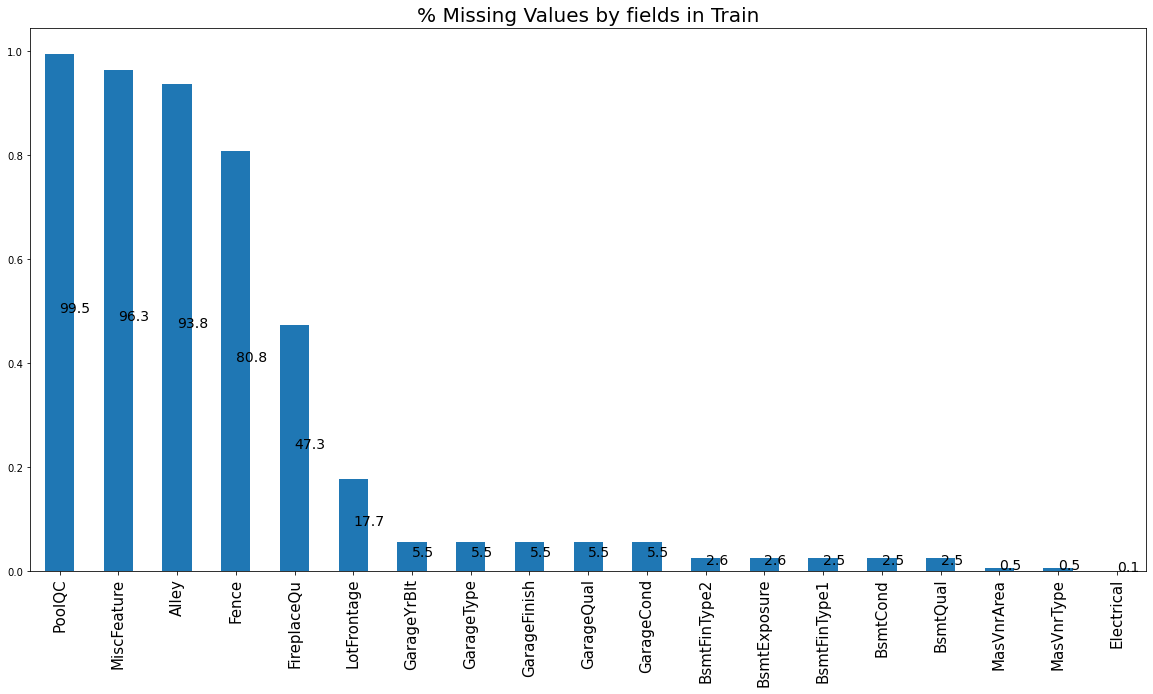

In [3]:

"""Plotting after combining cats"""
try:
    plt.figure(figsize=(20,10))
    y=traindata.isna().sum().loc[(traindata.isna().sum().sort_values(ascending=False))>0].apply(lambda x:x/len(traindata)).sort_values(ascending=False)
    y.plot(kind='bar')
    title = '% Missing Values by fields in Train'
    ax=y.plot(kind='bar',title=title)
    for i in range(0,len(y)):
        ax.annotate(round(y.iloc[i,]*100,1), xy =(i, y.iloc[i]/2),size=14)
    
except:
    print('')
plt.title(title,fontsize=20)
plt.xticks(fontsize=15)
plt.plot();


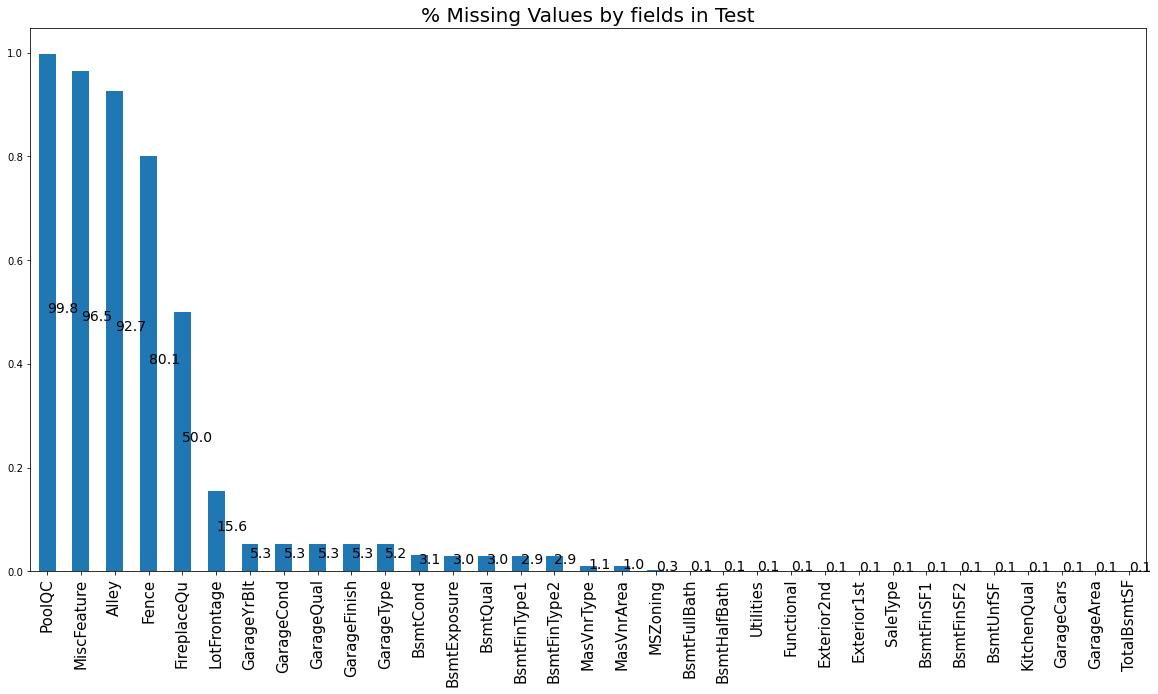

In [4]:
#test

"""Plotting after combining cats"""
try:
    plt.figure(figsize=(20,10))
    y=testdata.isna().sum().loc[(testdata.isna().sum().sort_values(ascending=False))>0].apply(lambda x:x/len(testdata)).sort_values(ascending=False)
    y.plot(kind='bar')
    title = '% Missing Values by fields in Test'
    ax=y.plot(kind='bar',title=title)
    for i in range(0,len(y)):
        ax.annotate(round(y.iloc[i,]*100,1), xy =(i, y.iloc[i]/2),size=14)
    
except:
    print('')
plt.title(title,fontsize=20)
plt.xticks(fontsize=15)
plt.plot();

### Missing Data Analysis

In [5]:
# pip install missingno

In [6]:
import missingno as msno

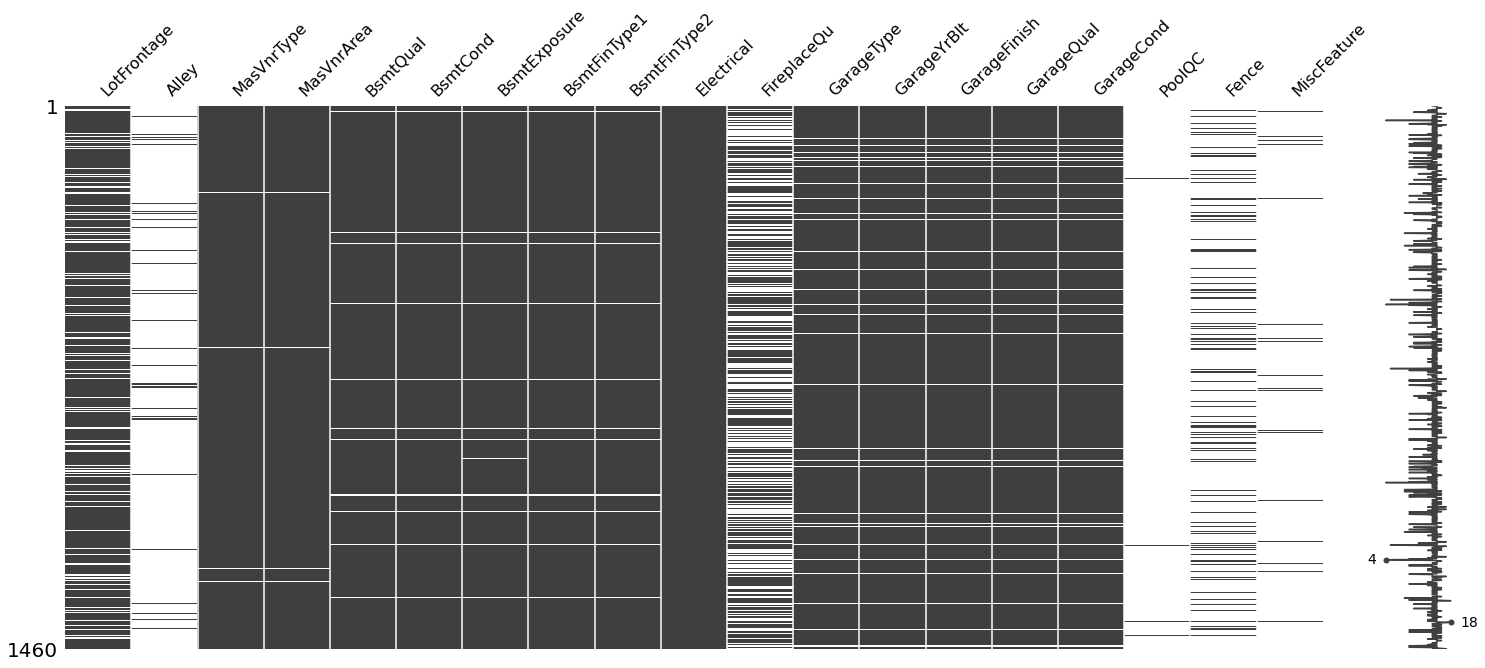

In [7]:
missing_cols=list(traindata.isna().sum().loc[(traindata.isna().sum().sort_values(ascending=False))>0].index)
msno.matrix(traindata[missing_cols])

- Garage and basement related fields are missing together, MNAR -> can mean no garage ?
- PoolQc,fence, miscfeature,alley have more than 80% data missing ahence can be excluded

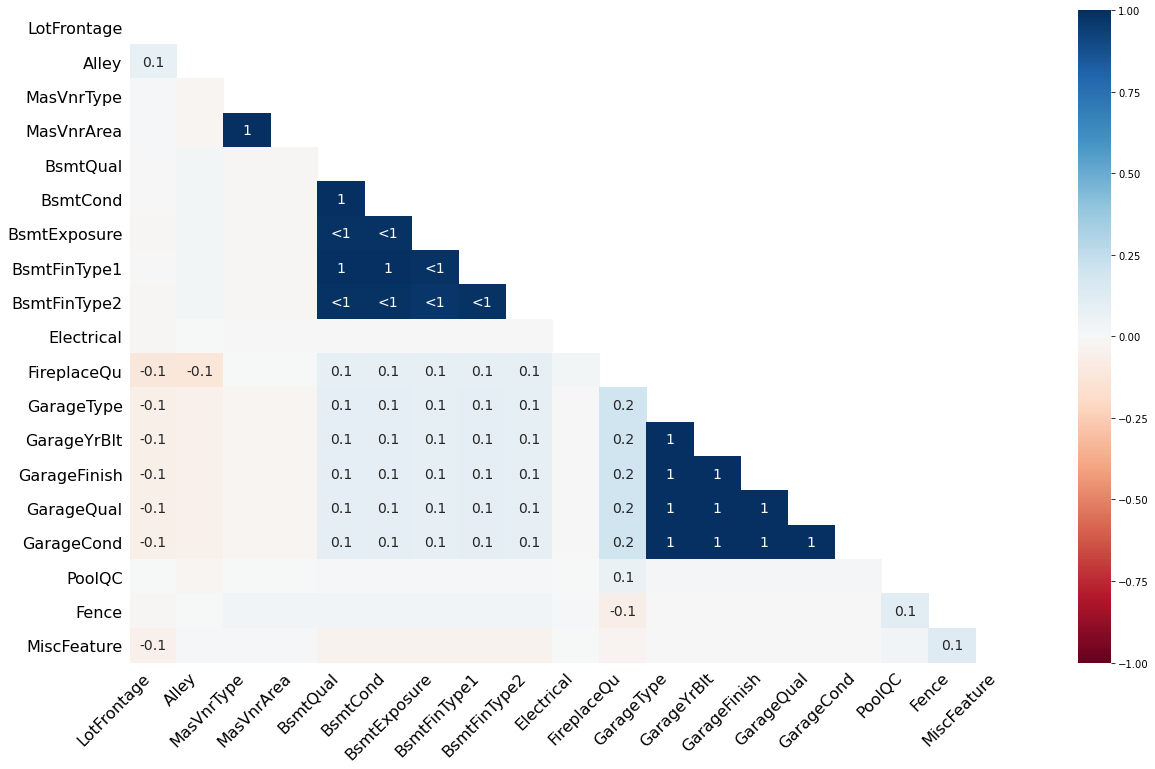

In [8]:
msno.heatmap(traindata[missing_cols])

In [9]:
#Creating data copies
train=traindata.copy()
test=testdata.copy()


### Sales price distribution

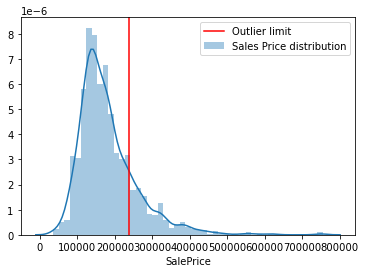

In [32]:
sns.distplot(train.SalePrice,label='Sales Price distribution')
outliers=3*train.SalePrice.std()
plt.axvline(outliers,c='r', label='Outlier limit')
plt.legend()
# plt.annotate(outliers);
# plt.annotate( outliers,xy =(outliers, 3),size=17)

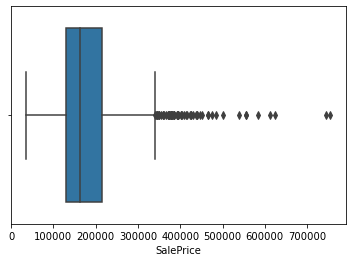

In [33]:
sns.boxplot(traindata.SalePrice)

- Long tail towards the left, a lot of outliers, probably needs to be treated differently

### Avg Sales price distribution with other categorical features 

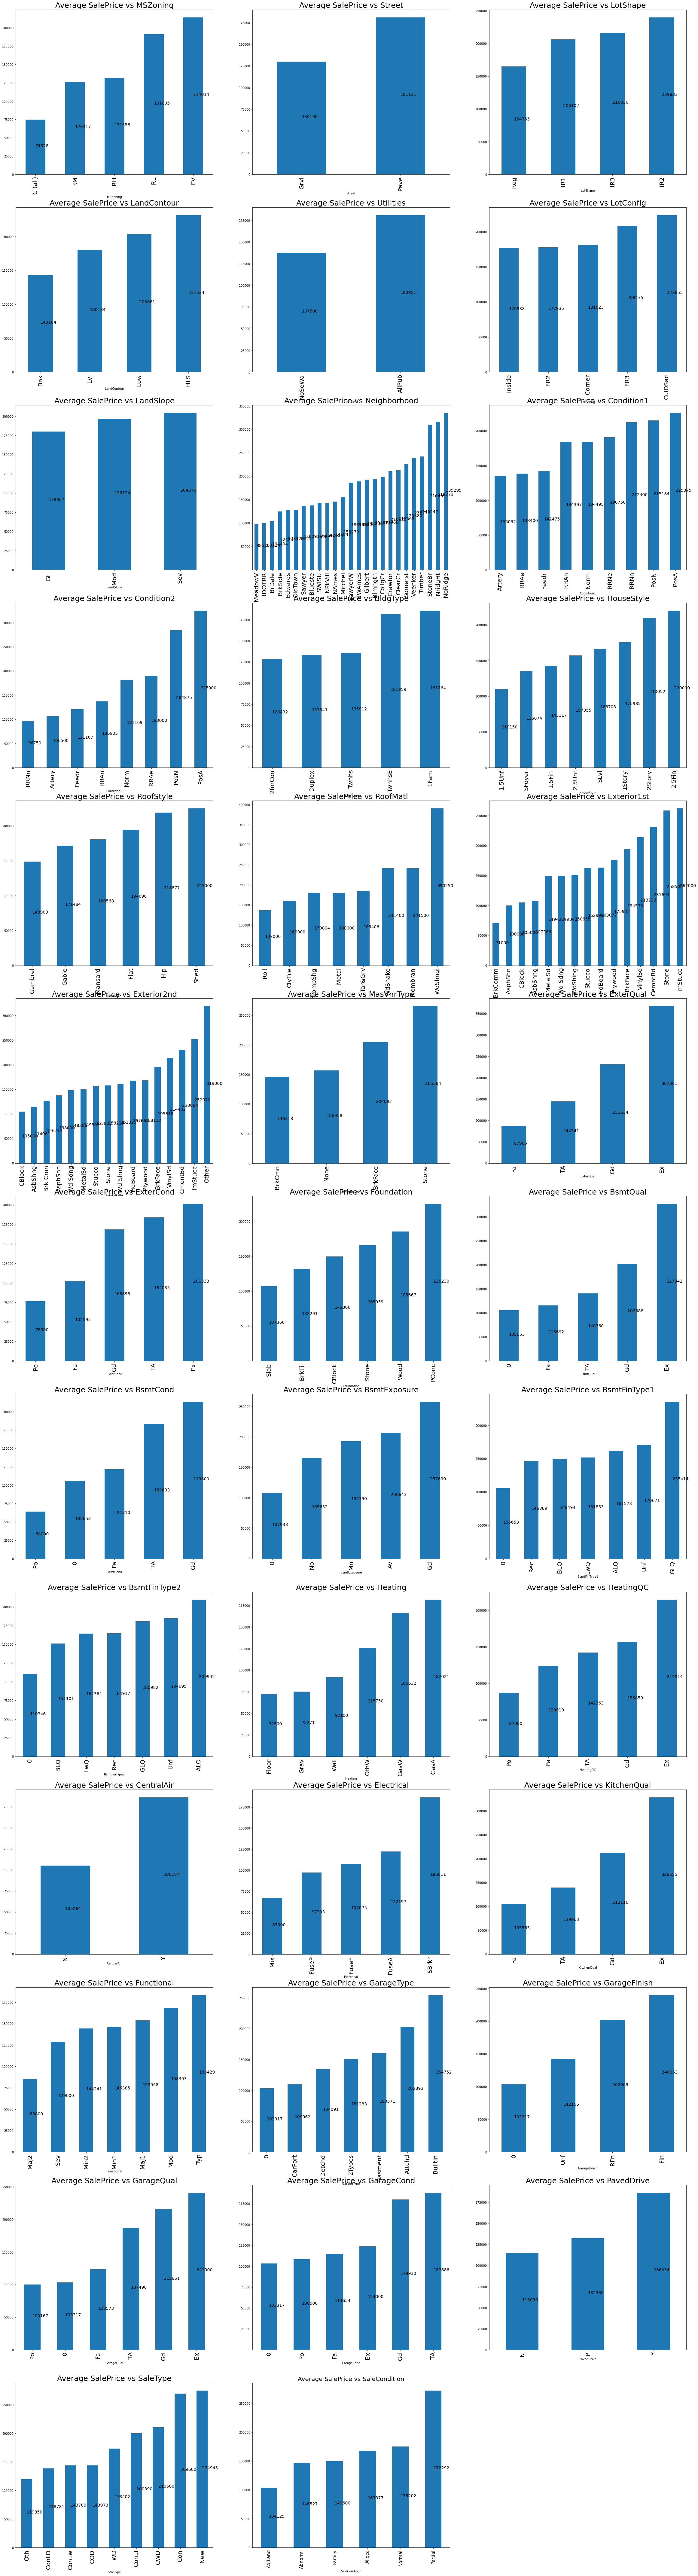

In [34]:
#declare variables for which plots are to be designed :
x_vars=list(train.select_dtypes(include=np.object).columns)
y_vars=['SalePrice']

#test

"""Plotting after combining cats"""
try:

    figsize=(40,round(len(x_vars)/2)*12) #dynamic figure size
    plt.figure(figsize=figsize);


    for j in y_vars:
        for i in x_vars:
            title= 'Average '+ j+' vs '+i
            plt.subplot(round(len(x_vars)/2),3,x_vars.index(i)+1)
            y=train.groupby(i)[j].mean().round().astype(int).sort_values()
            ax=y.plot(kind='bar',title=title)
            plt.title(title,fontsize=25)
            plt.xticks(fontsize=20)
            for k in range(0,len(y)):
                ax.annotate(y.iloc[k], xy =(k, y.iloc[k]/2),size=14);
    
except:
    print('')
plt.title(title,fontsize=20)
plt.xticks(fontsize=15)
plt.plot();

Based on the above categorical variable analysis, we can club a few categories together to reduce the number of categories based on the avg sales price.
such as :
1. Neighbourhood
2. Condition1
3. Condition2
4. Bldgtype
5. Exterior1st
6. Exterior2nd
7. SaleType
8. Garagetype
9. Electrical
10. RoofMatl
11. MsZoning


<Figure size 720x576 with 0 Axes>

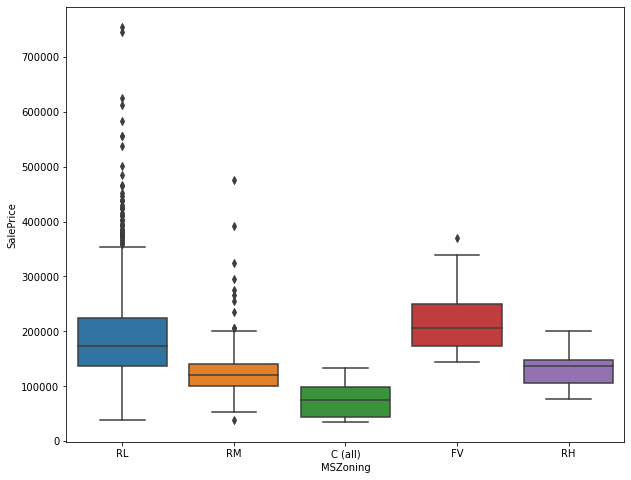

In [38]:
plt.figure(figsize=(10,8))
sns.boxplot(y=train.SalePrice,x=train.MSZoning)

## Feature Engineering and Data Imputation

changing data in odinal wherever for the following features :
- Utilities : AllPub -4,NoSewr-3,NoSeWa-2,ELO-1
- LandSlope : Gtl -1,Mod-2,Sev-3
- HouseStyle :  1Story - 1,SLvl-8
<!-- - RoofStyle : Flat	-1 Shed	-6
- RoofMatl :       ClyTile -1        WdShngl-8
- Exterior1st -->
<!-- - Exterior2nd -->
- MasVnrType :BrkCmn- 1       Stone-4
- ExterQual :Ex -5 Po -1       
- ExterCond :Ex -5 Po -1     
<!-- - Foundation : BrkTil-1 ,Wood-6 -->
- BsmtQual : Ex -5 ,NA -0
- BsmtCond : Ex -5 ,NA -0
- BsmtExposure :Gd -4 ,NA -0
- BsmtFinType1 : GLQ - 6, NA -0
- BsmtFinType2 : GLQ - 6, NA -0
- HeatingQC : Ex-5, Po-1
- KitchenQual: Ex-5, Po-1
- Functional :Typ - 8,Sal-1
- FireplaceQu: Ex-5, Po-1
<!-- - GarageType : 2Types -6 , NA -0 -->
- GarageFinish :Fin-3 , NA -0
- GarageQual: Ex-5, NA-0
- GarageCond :  Ex-5, NA-0
- PavedDrive : Y -2,N-0
- PoolQC :  Ex-4, NA-0
<!-- - Fence :GdPrv -4, NA-0 -->

Changing features which look ordinal but are actually categorical :
- MSSubClass

In [ ]:
Utilities={'AllPub' : 4,'NoSewr' : 3,'NoSeWa': 2,'ELO':1}
LandSlope={'Sev' : 3,'Mod': 2,'Gtl':1}
HouseStyle={'SLvl' : 8,'SFoyer' : 7,'2.5Unf': 6,'2.5Fin':5,'2Story' : 4,
            '1.5Unf' : 3,'1.5Fin': 2,'1Story':1}
MasVnrType={'Stone' : 4,'CBlock' : 3,'BrkFace': 2,'BrkCmn':1,'None':0}
ExterQual={'Ex' : 5,'Gd' : 4,'TA': 3,'Fa':2,'Po':1}
ExterCond={'Ex' : 5,'Gd' : 4,'TA': 3,'Fa':2,'Po':1}
BsmtQual={'Ex' : 5,'Gd' : 4,'TA': 3,'Fa':2,'Po':1,'NA':0}
BsmtCond={'Ex' : 5,'Gd' : 4,'TA': 3,'Fa':2,'Po':1,'NA':0}
BsmtExposure={'Gd' : 4,'Av': 3,'Mn':2,'No':1,'NA':0}
BsmtFinType1={'GLQ':6,'ALQ' : 5,'BLQ' : 4,'Rec': 3,'LwQ':2,'Unf':1,'NA':0}
BsmtFinType2={'GLQ':6,'ALQ' : 5,'BLQ' : 4,'Rec': 3,'LwQ':2,'Unf':1,'NA':0}
HeatingQC={'Ex' : 5,'Gd' : 4,'TA': 3,'Fa':2,'Po':1,'NA':0}
KitchenQual={'Ex' : 5,'Gd' : 4,'TA': 3,'Fa':2,'Po':1,'NA':0}
Functional={'Typ' : 8,'Min1' : 7,'Min2' : 6,'Mod' : 5,'Maj1': 4,'Maj2':3,'Sev':2,'Sal':1}
FireplaceQu={'Ex' : 5,'Gd' : 4,'TA': 3,'Fa':2,'Po':1,'NA':0}
GarageFinish={'Fin': 3,'RFn':2,'Unf':1,'NA':0}
GarageQual={'Ex' : 5,'Gd' : 4,'TA': 3,'Fa':2,'Po':1,'NA':0}
GarageCond={'Ex' : 5,'Gd' : 4,'TA': 3,'Fa':2,'Po':1,'NA':0}
PavedDrive={'Y':2,'P':1,'N':0}
PoolQC={'Ex' : 5,'Gd' : 4,'TA': 3,'Fa':2,'Po':1,'NA':0}
 

In [14]:
#train :
train['Utilities'].replace(Utilities, inplace=True)
train['LandSlope'].replace(LandSlope, inplace=True)
train['HouseStyle'].replace(HouseStyle, inplace=True)
train['MasVnrType'].replace(MasVnrType, inplace=True)
train['ExterQual'].replace(ExterQual, inplace=True)
train['ExterCond'].replace(ExterCond, inplace=True)
train['BsmtQual'].replace(BsmtQual, inplace=True)
train['BsmtCond'].replace(BsmtCond, inplace=True)
train['BsmtExposure'].replace(BsmtExposure, inplace=True)
train['BsmtFinType1'].replace(BsmtFinType1, inplace=True)
train['BsmtFinType2'].replace(BsmtFinType2, inplace=True)
train['HeatingQC'].replace(HeatingQC, inplace=True)
train['KitchenQual'].replace(KitchenQual, inplace=True)
train['Functional'].replace(Functional, inplace=True)
train['FireplaceQu'].replace(FireplaceQu, inplace=True)
train['GarageFinish'].replace(GarageFinish, inplace=True)
train['GarageQual'].replace(GarageQual, inplace=True)
train['GarageCond'].replace(GarageCond, inplace=True)
train['PavedDrive'].replace(PavedDrive, inplace=True)
train['PoolQC'].replace(PoolQC, inplace=True)

#test :
test['Utilities'].replace(Utilities, inplace=True)
test['LandSlope'].replace(LandSlope, inplace=True)
test['HouseStyle'].replace(HouseStyle, inplace=True)
test['MasVnrType'].replace(MasVnrType, inplace=True)
test['ExterQual'].replace(ExterQual, inplace=True)
test['ExterCond'].replace(ExterCond, inplace=True)
test['BsmtQual'].replace(BsmtQual, inplace=True)
test['BsmtCond'].replace(BsmtCond, inplace=True)
test['BsmtExposure'].replace(BsmtExposure, inplace=True)
test['BsmtFinType1'].replace(BsmtFinType1, inplace=True)
test['BsmtFinType2'].replace(BsmtFinType2, inplace=True)
test['HeatingQC'].replace(HeatingQC, inplace=True)
test['KitchenQual'].replace(KitchenQual, inplace=True)
test['Functional'].replace(Functional, inplace=True)
test['FireplaceQu'].replace(FireplaceQu, inplace=True)
test['GarageFinish'].replace(GarageFinish, inplace=True)
test['GarageQual'].replace(GarageQual, inplace=True)
test['GarageCond'].replace(GarageCond, inplace=True)
test['PavedDrive'].replace(PavedDrive, inplace=True)
test['PoolQC'].replace(PoolQC, inplace=True)


NameError: name 'Utilities' is not defined

### Pool, Fireplace, miscellaneous

We see that wherever the pool QC is missing the area of pool is 0, that indicates that the pool is not present in those houses
Same goes with fireplace!


In [16]:
# Fire place/
traindata.loc[traindata.FireplaceQu.isna()]['Fireplaces'].unique()
testdata.loc[testdata.FireplaceQu.isna()]['Fireplaces'].unique()

array([0])

array([0])

In [17]:
traindata.loc[traindata.PoolQC.isna()]['PoolArea'].unique()
# testdata.loc[testdata.PoolQC.isna()]['PoolArea'].unique()

array([0])

In [19]:
#Pool, fireplace & misc indicator :

train['pool_ind']=np.where(train.PoolArea==0,0,1)
test['pool_ind']=np.where(test.PoolArea==0,0,1)


train['fireplace_ind']=np.where(train.Fireplaces==0,0,1)
test['fireplace_ind']=np.where(test.Fireplaces==0,0,1)

train['misc_ind']=np.where(train.MiscVal==0,0,1)
test['misc_ind']=np.where(test.MiscVal==0,0,1)

checking distribution of price with and without pool

In [20]:
train.pool_ind.value_counts(sorted)*100
train.fireplace_ind.value_counts(sorted)*100
train.misc_ind.value_counts(sorted)*100

0    99.520548
1     0.479452
Name: pool_ind, dtype: float64

1    52.739726
0    47.260274
Name: fireplace_ind, dtype: float64

0    96.438356
1     3.561644
Name: misc_ind, dtype: float64

### Price distribution by Pool, fireplace

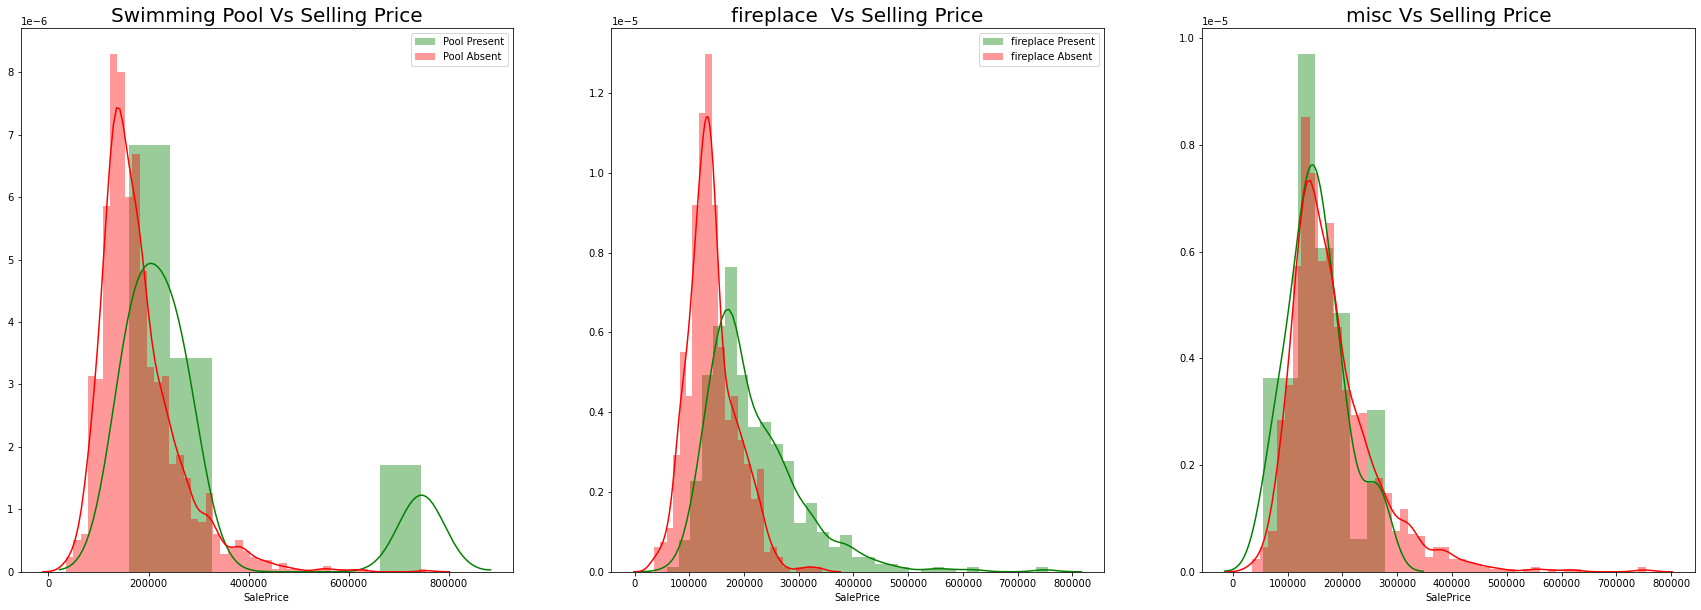

In [21]:

plt.figure(figsize=(30,10))
plt.subplot(1,3,1)

sns.distplot(train.SalePrice.loc[train.pool_ind==1],color='g',label='Pool Present')
sns.distplot(train.SalePrice.loc[train.pool_ind==0],color='r',label='Pool Absent')
plt.title('Swimming Pool Vs Selling Price',fontsize=20)
plt.legend(fontsize=10);
plt.subplot(1,3,2)
# plt.figure(figsize=(10,8))
sns.distplot(train.SalePrice.loc[train.fireplace_ind==1],color='g',label='fireplace Present')
sns.distplot(train.SalePrice.loc[train.fireplace_ind==0],color='r',label='fireplace Absent')
plt.title('fireplace  Vs Selling Price',fontsize=20)

plt.legend(fontsize=10);

plt.subplot(1,3,3)
# plt.figure(figsize=(10,8))
sns.distplot(train.SalePrice.loc[train.misc_ind==1],color='g',label='misc Present')
sns.distplot(train.SalePrice.loc[train.misc_ind==0],color='r',label='misc Absent')
plt.title('misc Vs Selling Price',fontsize=20);

# plt.legend(fontsize=10);



### data Imputation 

#### Garage realated features :
the values are MNAR and where ever the data is missing the area = 0 . Therefore, we can safely assume that wherever the garage related features are missing it can be replaced by 0 or (no garage)

In [23]:
traindata.loc[traindata.GarageCond.isna()].GarageArea.unique()

array([0])

In [24]:
# train
train['GarageType']=train['GarageType'].fillna(0);
train['GarageYrBlt']=train['GarageYrBlt'].fillna(0);
train['GarageFinish']=train['GarageFinish'].fillna(0);
train['GarageQual']=train['GarageQual'].fillna(0);
train['GarageCond']=train['GarageCond'].fillna(0);

# test
test['GarageType']=test['GarageType'].fillna(0);
test['GarageYrBlt']=test['GarageYrBlt'].fillna(0);
test['GarageFinish']=test['GarageFinish'].fillna(0);
test['GarageQual']=test['GarageQual'].fillna(0);
test['GarageCond']=test['GarageCond'].fillna(0);

test['GarageArea']=test['GarageArea'].fillna(0);
test['GarageCars']=test['GarageCars'].fillna(0);

#### Basement Related features :

Same as Garage features, the finished are of basement is zero weherever there's a missing value, Therefore, assuming that the basement is not present in the house and substituting wih 0 (or NA)

In [25]:
#CHECK :
train.loc[train['BsmtExposure'].isna()]['BsmtFinSF1'].unique()

array([0])

In [26]:
#Imputation :

#train

train['BsmtExposure']=train['BsmtExposure'].fillna(0);
train['BsmtFinType2']=train['BsmtFinType2'].fillna(0);
train['BsmtQual']=train['BsmtQual'].fillna(0);
train['BsmtCond']=train['BsmtCond'].fillna(0);
train['BsmtFinType1']=train['BsmtFinType1'].fillna(0);


# test

test['BsmtExposure']=test['BsmtExposure'].fillna(0);
test['BsmtFinType2']=test['BsmtFinType2'].fillna(0);
test['BsmtQual']=test['BsmtQual'].fillna(0);
test['BsmtCond']=test['BsmtCond'].fillna(0);
test['BsmtFinType1']=test['BsmtFinType1'].fillna(0);

test['TotalBsmtSF']=test['TotalBsmtSF'].fillna(0);
test['BsmtFinSF1']=test['BsmtFinSF1'].fillna(0);
test['BsmtUnfSF']=test['BsmtUnfSF'].fillna(0);
test['BsmtFullBath']=test['BsmtFullBath'].fillna(0);
test['BsmtFinSF2']=test['BsmtFinSF2'].fillna(0);
test['BsmtHalfBath']=test['BsmtHalfBath'].fillna(0);


In [28]:
# Train data ::
# median imputation
train['LotFrontage']=train['LotFrontage'].fillna(train.LotFrontage.median());
train['MasVnrArea']=train['MasVnrArea'].fillna(train.MasVnrArea.median());

# #Mode imputation
train['MasVnrType']=train['MasVnrType'].fillna(train.MasVnrType.mode().iloc[0]);
train['Electrical']=train['Electrical'].fillna(train.Electrical.mode().iloc[0]);

# Test data :
# median imputation
test['LotFrontage']=test['LotFrontage'].fillna(test.LotFrontage.median());
test['MasVnrArea']=test['MasVnrArea'].fillna(test.MasVnrArea.median());

# #Mode imputation

test['MasVnrType']=test['MasVnrType'].fillna(test.MasVnrType.mode().iloc[0]);
test['Electrical']=test['Electrical'].fillna(test.Electrical.mode().iloc[0]);

# ----- MODE IMPUTATION FOR OTHER COLS HAVING NULLS IN TEST DATA--#


test['MSZoning']=test['MSZoning'].fillna(test.MSZoning.mode().iloc[0]);
test['Utilities']=test['Utilities'].fillna(test.Utilities.mode().iloc[0]);
test['Exterior1st']=test['Exterior1st'].fillna(test.Exterior1st.mode().iloc[0]);
test['Exterior2nd']=test['Exterior2nd'].fillna(test.Exterior2nd.mode().iloc[0]);
test['KitchenQual']=test['KitchenQual'].fillna(test.KitchenQual.mode().iloc[0]);
test['SaleType']=test['SaleType'].fillna(test.SaleType.mode().iloc[0]);
test['Functional']=test['Functional'].fillna(test.Functional.mode().iloc[0]);


Transforming years into age columns

In [29]:
# train
train['age_of_house']=2020-train['YearBuilt']
train['years_remodelled']=2020-train['YearRemodAdd']
train['age_garage']=2020-train['GarageYrBlt']
train['YrSold']=2020-train['YrSold']

#test
test['age_of_house']=2020-test['YearBuilt']
test['years_remodelled']=2020-test['YearRemodAdd']
test['age_garage']=2020-test['GarageYrBlt']
test['YrSold']=2020-test['YrSold']


Dropping cols with 40%+ missing vals

In [30]:
train.drop(columns=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],inplace=True)
test.drop(columns=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],inplace=True)

In [31]:
test.isna().sum().loc[(test.isna().sum().sort_values(ascending=False))>0]

Series([], dtype: int64)

In [120]:
train_nc.shape

(1460, 184)

### Clubbing categories based on Average sales price distribution 

In [36]:
#train
train['LotConfig_1']=np.where(train['LotConfig'].isin(['Inside','FR2','Corner']),'Inside_FR2_Corner',train['LotConfig'])
train['Condition1_1']=np.where(train['Condition1'].isin(['Artery','RRAe','Feedr']),'Artery_RRAe_Feedr',
                               np.where(train['Condition1'].isin(['Norm','RRNe','RRAn']),'Norm_RRNe_RRAn',
                                       np.where(train['Condition1'].isin(['RRNn','PosN','PosA']),'RRNn_PosN_PosA',
                                               train['Condition1'])))
# BldgType
train['BldgType_1']=np.where(train['BldgType'].isin(['2fmCon','Duplex','Twnhs']),'2fmCon_Duplex_Twnhs','TwnhsE_1Fam')

# RoofMatl
train['RoofMatl_1']=np.where(train['RoofMatl'].isin(['CompShg','Metal','Tar&Grv']),'CompShg_Metal_Tar&Grv',
                             np.where(train['RoofMatl'].isin(['WdShake','Membran']),'WdShake_Membran',train['RoofMatl']))
# Neighborhood
Neighborhood={ 'MeadowV' :'A', 'IDOTRR' :'A', 'BrDale' :'A', 'BrkSide' :'B', 'Edwards' :'B', 'OldTown' :'B', 
              'Sawyer' :'C', 'Blueste' :'C', 'SWISU' :'C', 'NPkVill' :'C', 'NAmes' :'C', 'Mitchel' :'D',
             'SawyerW' :'E', 'NWAmes' :'E', 'Gilbert' :'E', 'Blmngtn' :'E', 'CollgCr' :'E', 'Crawfor' :'F', 'ClearCr' :'F',
             'Somerst' :'G', 'Veenker' :'H', 'Timber' :'H', 'StoneBr' :'I',
             'NridgHt' :'I', 'NoRidge' :'NoRidge'}
train['Neighborhood_1']=train['Neighborhood'].replace(Neighborhood)

#exterior1st 
train['Exterior1st_1']=np.where(train['Exterior1st'].isin(['AsphShn','CBlock','AsbShng']),'AsphShn_CBlock_AsbShng',
                             np.where(train['Exterior1st'].isin(['MetalSd','Wd Sdng','WdShing']),'MetalSd_WdSdng_WdShing',
                                      np.where(train['Exterior1st'].isin(['Stucco','HdBoard']),'Stucco_HdBoard',train['Exterior1st'])))
#exterior1st 
train['Exterior2nd_1']=np.where(train['Exterior2nd'].isin(['Wd Sdng','MetalSd','Stucco','Stone']),'WdSdng_MetalSd_Stucco_Stone',
                             np.where(train['Exterior2nd'].isin(['Wd Shng','HdBoard','Plywood']),'WdShng_HdBoard_Plywood',train['Exterior1st']))


#exterior1st 
train['SaleType_1']=np.where(train['SaleType'].isin(['ConLw','COD']),'ConLw_COD',
                             np.where(train['SaleType'].isin(['ConLI','CWD']),'ConLI_CWD',
                                np.where(train['SaleType'].isin(['Con','New']),'Con_New',train['SaleType'])))

In [37]:
#test :

test['LotConfig_1']=np.where(test['LotConfig'].isin(['Inside','FR2','Corner']),'Inside_FR2_Corner',test['LotConfig'])
test['Condition1_1']=np.where(test['Condition1'].isin(['Artery','RRAe','Feedr']),'Artery_RRAe_Feedr',
                               np.where(test['Condition1'].isin(['Norm','RRNe','RRAn']),'Norm_RRNe_RRAn',
                                       np.where(test['Condition1'].isin(['RRNn','PosN','PosA']),'RRNn_PosN_PosA',
                                               test['Condition1'])))
# BldgType
test['BldgType_1']=np.where(test['BldgType'].isin(['2fmCon','Duplex','Twnhs']),'2fmCon_Duplex_Twnhs','TwnhsE_1Fam')

# RoofMatl
test['RoofMatl_1']=np.where(test['RoofMatl'].isin(['CompShg','Metal','Tar&Grv']),'CompShg_Metal_Tar&Grv',
                             np.where(test['RoofMatl'].isin(['WdShake','Membran']),'WdShake_Membran',test['RoofMatl']))
# Neighborhood
Neighborhood={ 'MeadowV' :'A', 'IDOTRR' :'A', 'BrDale' :'A', 'BrkSide' :'B', 'Edwards' :'B', 'OldTown' :'B', 
              'Sawyer' :'C', 'Blueste' :'C', 'SWISU' :'C', 'NPkVill' :'C', 'NAmes' :'C', 'Mitchel' :'D',
             'SawyerW' :'E', 'NWAmes' :'E', 'Gilbert' :'E', 'Blmngtn' :'E', 'CollgCr' :'E', 'Crawfor' :'F', 'ClearCr' :'F',
             'Somerst' :'G', 'Veenker' :'H', 'Timber' :'H', 'StoneBr' :'I',
             'NridgHt' :'I', 'NoRidge' :'NoRidge'}
test['Neighborhood_1']=test['Neighborhood'].replace(Neighborhood)

#exterior1st 
test['Exterior1st_1']=np.where(test['Exterior1st'].isin(['AsphShn','CBlock','AsbShng']),'AsphShn_CBlock_AsbShng',
                             np.where(test['Exterior1st'].isin(['MetalSd','Wd Sdng','WdShing']),'MetalSd_WdSdng_WdShing',
                                      np.where(test['Exterior1st'].isin(['Stucco','HdBoard']),'Stucco_HdBoard',test['Exterior1st'])))
#exterior1st 
test['Exterior2nd_1']=np.where(test['Exterior2nd'].isin(['Wd Sdng','MetalSd','Stucco','Stone']),'WdSdng_MetalSd_Stucco_Stone',
                             np.where(test['Exterior2nd'].isin(['Wd Shng','HdBoard','Plywood']),'WdShng_HdBoard_Plywood',test['Exterior1st']))


#exterior1st 
test['SaleType_1']=np.where(test['SaleType'].isin(['ConLw','COD']),'ConLw_COD',
                             np.where(test['SaleType'].isin(['ConLI','CWD']),'ConLI_CWD',
                                np.where(test['SaleType'].isin(['Con','New']),'Con_New',test['SaleType'])))


In [39]:
# deleting extra columns from train and test

drop_cols=['LotConfig','Condition1','BldgType','RoofMatl','Neighborhood','Exterior1st','Exterior2nd','SaleType','YearBuilt','YearRemodAdd','GarageYrBlt']

In [40]:
#df with no extra cols
train_v1=train.drop(columns=drop_cols).copy()
test_v1=test.drop(columns=drop_cols).copy()

In [41]:
#df for creating dummies
train_v2=train.drop(columns=drop_cols).copy()
test_v2=test.drop(columns=drop_cols).copy()

## Correlated Matrix 

Correlation matrix will be huge, hence only taking features with high correlation with each other to be represented in the heatmap

In [42]:
# storing correlation matrix in a variable
corr_matrix=train_v2[train_v2.select_dtypes(include=np.number).columns].corr()
#assigning index to a variable to melt df
corr_matrix['variable1']=corr_matrix.index
# melting the df through variable1
corr_matrix_melted=corr_matrix.melt(id_vars='variable1')

#identifying and deleting rows where variable correlation with itself is given :
corr_matrix_melted['delete_row']=np.where(corr_matrix_melted.variable1==corr_matrix_melted.variable,1,0)
corr_matrix_melted=corr_matrix_melted.loc[corr_matrix_melted.delete_row==0]

# checking correlation of other variables wrt Y
corr_matrix_melted.loc[corr_matrix_melted.variable=='SalePrice']

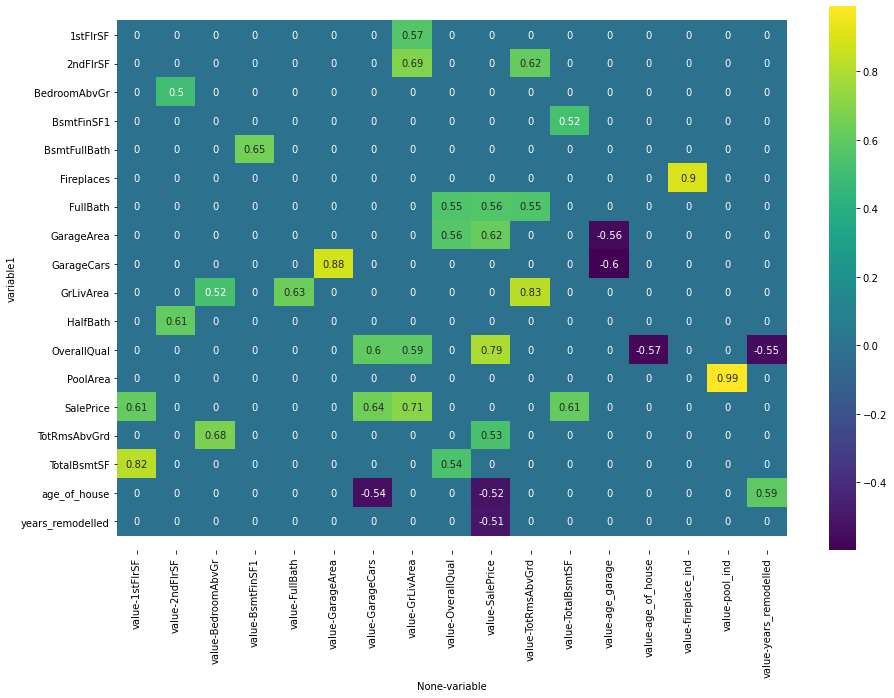

In [50]:
#picking up variable pairs with abs(correlation) >0.5

x=corr_matrix_melted.loc[abs(corr_matrix_melted.value)>0.5].sort_values(by='value').reset_index()

"""UN-MELTING THE DATA"""
df_unmelted = x[['variable1','variable','value']].iloc[::2].pivot(index='variable1', columns='variable')
# Creating a heatmap for correlated variables for corr >=0.5
plt.figure(figsize=(15,10))
ax=sns.heatmap(df_unmelted.fillna(0),cmap='viridis',annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

- from the above correlation plot we can see that a few variables are highly correlated with each other,hence one of them can be excluded
- highly correlated field :{'BsmtFinSF1','BsmtFullBath','GrLivArea','GarageCars','HalfBath','TotRmsAbvGrd','TotalBsmtSF','OverallQual','pool_ind', 'fireplace_ind'}

In [54]:
cols_non_corel_train=list(set(train_v2.columns)-{'BsmtFinSF1','BsmtFullBath','GrLivArea','GarageCars','HalfBath','TotRmsAbvGrd','TotalBsmtSF','OverallQual','pool_ind', 'fireplace_ind'})
cols_non_corel_test=list(set(train_v2.columns)-{'BsmtFinSF1','BsmtFullBath','GrLivArea','GarageCars','HalfBath','TotRmsAbvGrd','TotalBsmtSF','OverallQual','pool_ind', 'fireplace_ind','SalePrice'})

In [55]:
#Creating dfs excluding high correlated values
train_nc=train_v2[cols_non_corel_train]
test_nc=test_v2[cols_non_corel_test]

In [57]:
train_nc=pd.get_dummies(train_nc,drop_first=True)
test_nc=pd.get_dummies(test_nc,drop_first=True)

In [59]:
drop_cols2=list(set(train_nc.columns)-set(test_nc.columns)-{'SalePrice'})

train_nc.drop(columns=drop_cols2,inplace=True)

In [56]:
#dummies

train_v2=pd.get_dummies(train_v2,drop_first=True)
test_v2=pd.get_dummies(test_v2,drop_first=True)

In [58]:
drop_cols2=list(set(train_v2.columns)-set(test_v2.columns)-{'SalePrice'})

train_v2.drop(columns=drop_cols2,inplace=True)

In [122]:
# without outliers
train_nc_out=train_nc.loc[train_nc['SalePrice']<400000].copy()

## Data export

In [111]:
# export for running xgb 
train_nc.to_csv('train_nc.csv')
train_nc_out.to_csv('train_nc_out.csv')
train_nc_out_lg.to_csv('train_nc_out_lg.csv')
test_nc.to_csv('test_nc.csv')
test_v2.to_csv('test_v2.csv')
train_v2.to_csv('train_v2.csv')
# test_nc